<a href="https://colab.research.google.com/github/Gabitoto/Gabitoto/blob/main/Housing_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

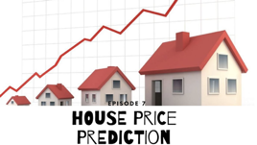

In [ ]:
!pip install ipython-autotime --quiet
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 4.82 s (started: 2023-07-24 23:49:42 +00:00)


In [ ]:
!pip install catboost  --quiet
!pip install ipywidgets  --quiet
!jupyter nbextension enable --py widgetsnbextension

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 11.9 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
time: 21.3 s (started: 2023-07-24 23:49:56 +00:00)


# **Acceso al dataset y Visualizacion**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

time: 526 ms (started: 2023-07-24 23:50:29 +00:00)


Vamos a utilizar el dataset [California Housing](https://developers.google.com/machine-learning/crash-course/california-housing-data-description).

In [ ]:
#url1 = "https://raw.githubusercontent.com/subhadipml/California-Housing-Price-Prediction/master/housing.csv"
url2 = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
housing_df = pd.read_csv(url2)
print(housing_df.shape)
housing_df.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


time: 127 ms (started: 2023-07-24 23:50:34 +00:00)


Hacemos una primera inspeccion del dataset.

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
time: 19.3 ms (started: 2023-07-24 23:50:40 +00:00)


In [ ]:
housing_df["ocean_proximity"].value_counts() # Esta variable es categorica (no es numerica), y queremos ver la cantidad de valores.

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

time: 4.86 ms (started: 2023-07-24 23:50:50 +00:00)


<Axes: >

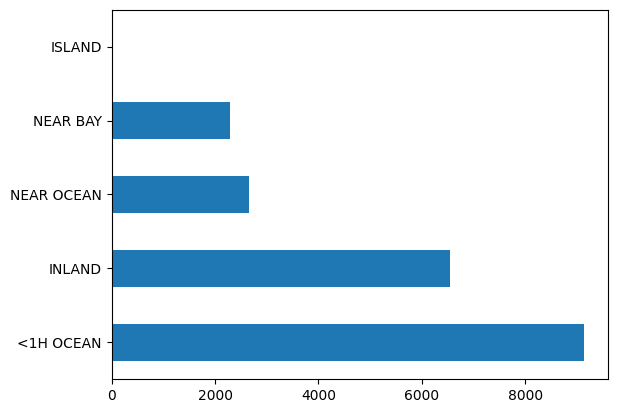

time: 246 ms (started: 2023-07-24 23:53:56 +00:00)


In [ ]:
housing_df["ocean_proximity"].value_counts().plot(kind='barh')

In [ ]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


time: 29.8 ms (started: 2023-07-24 23:54:05 +00:00)


# **Division en conjuntos de entrenamiento y test**

Esto es importante para realizar, luego, la evaluación del desempeño del modelo de regresion.



In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_df, test_size=0.2, random_state=42) # Hacemos una division 80/20%

time: 749 ms (started: 2023-07-24 23:54:11 +00:00)


In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB
time: 10.5 ms (started: 2023-07-24 23:54:18 +00:00)


In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 20046 to 3665
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      3921 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB
time: 7.48 ms (started: 2023-07-24 23:54:21 +00:00)


Visualizacion de la distribucion de la variable a predecir (median house value) de ambos datasets (para inspeccionarlo mejor)

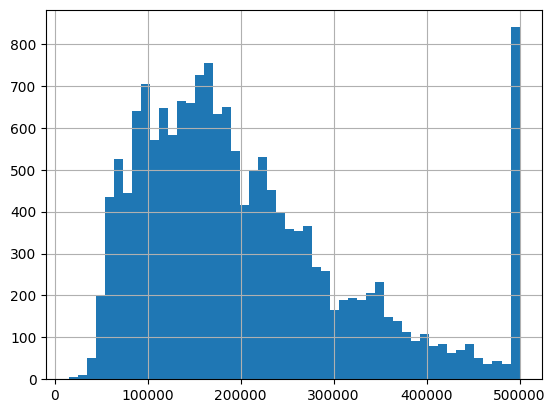

time: 375 ms (started: 2023-07-24 23:54:30 +00:00)


In [ ]:
train_set["median_house_value"].hist(bins=50)
plt.show()

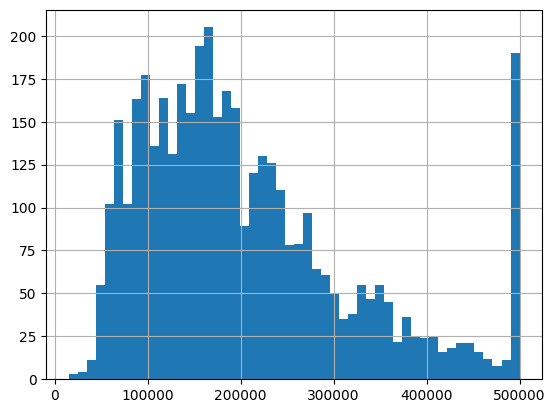

time: 188 ms (started: 2023-07-24 23:54:35 +00:00)


In [ ]:
test_set["median_house_value"].hist(bins=50)
plt.show()

Observamos que hay outliers, que podriamos llegar a remover (o no).

In [ ]:
# TODO: Codificar una funcion que permita remover outliers


time: 194 µs (started: 2023-07-24 23:54:43 +00:00)


Tambien podriamos ver si una transformacion logaritimica cambia (corrige) la distribucion de la variable

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def apply_log(column, scaling=True):
  data = column
  if scaling:
    scaler = MinMaxScaler() # Primero aplicamos escalado al rango [0,1]
    data = scaler.fit_transform(column.values.reshape(-1, 1))

  log_variable = np.log(data+1)

  return pd.DataFrame(log_variable, columns=[column.name])

time: 594 µs (started: 2023-07-24 23:54:46 +00:00)


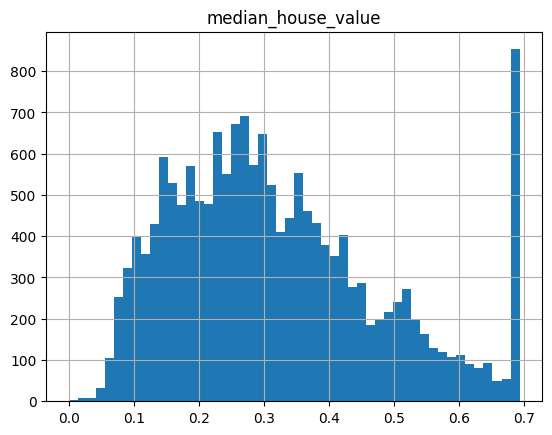

time: 219 ms (started: 2023-07-24 23:55:07 +00:00)


In [ ]:
log_col = apply_log(train_set['median_house_value'])
log_col.hist(bins=50)
plt.show()

Veamos la distribucion de todas las variables (features).

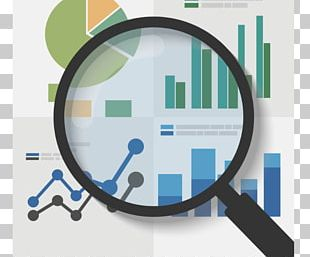

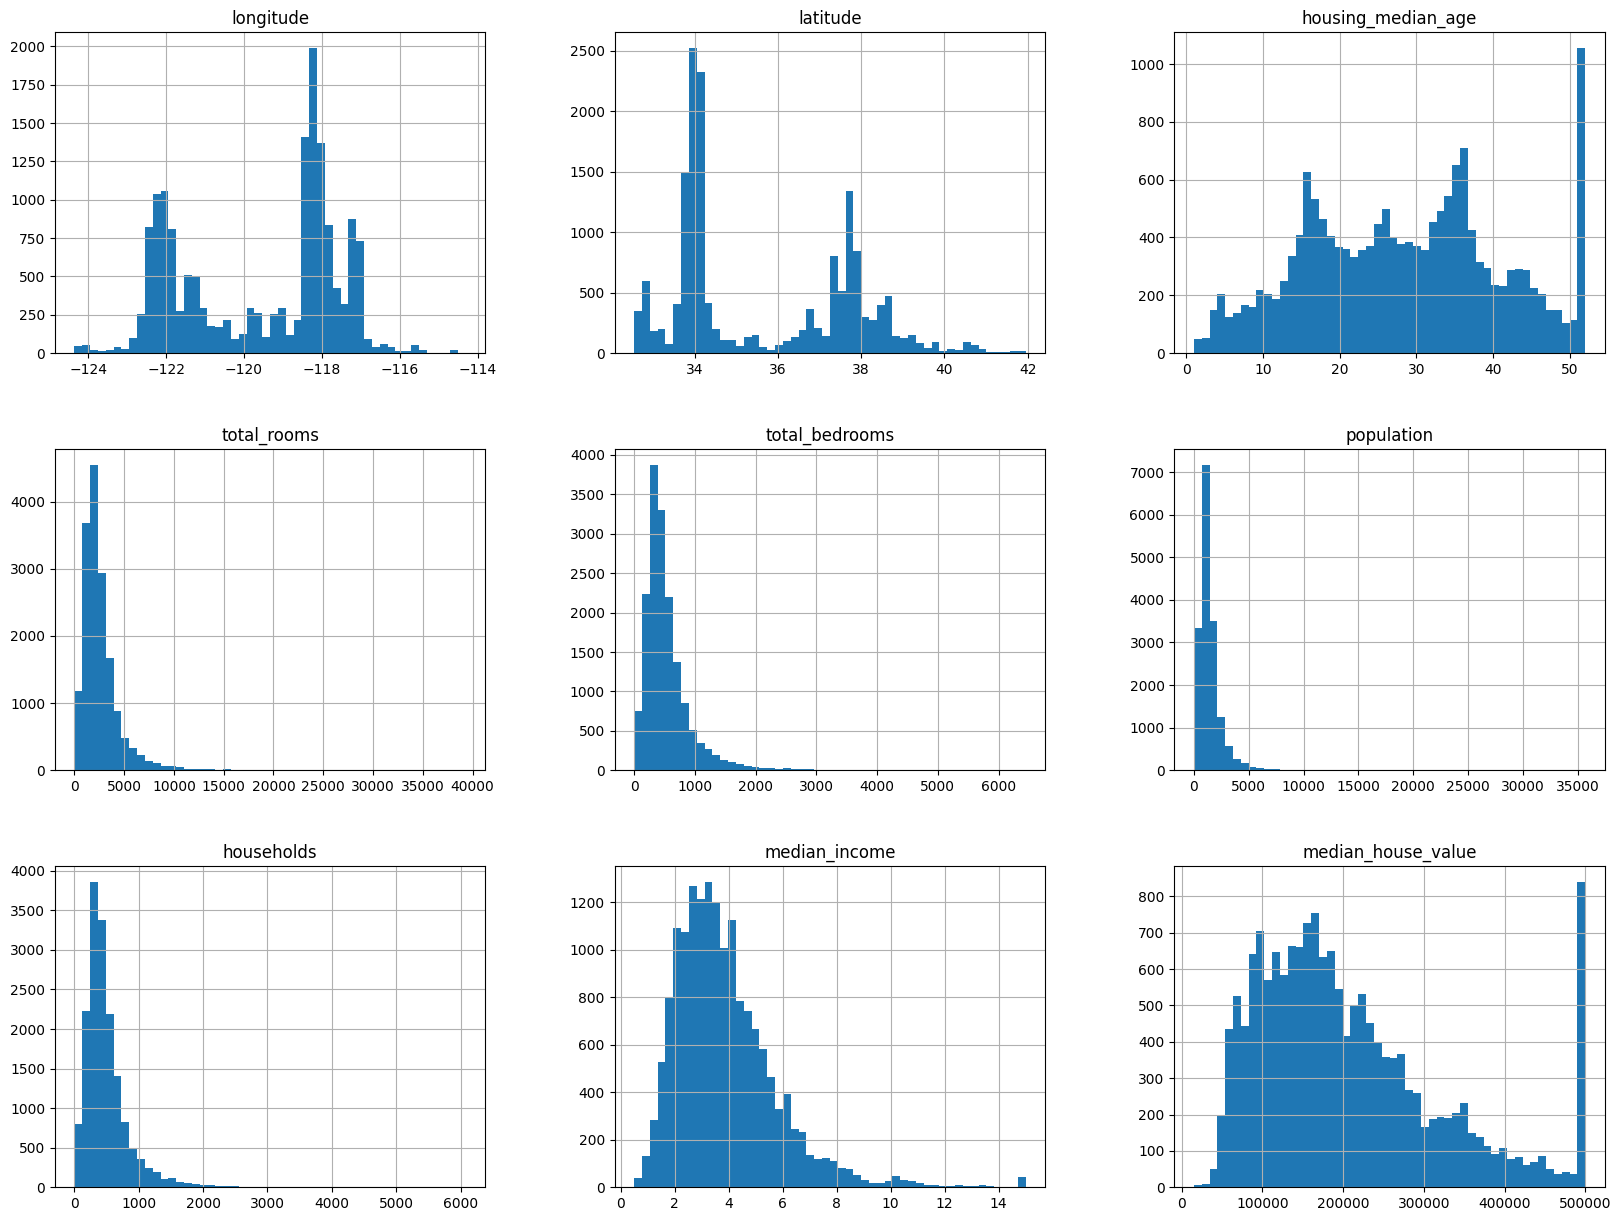

time: 2.11 s (started: 2023-07-24 23:55:15 +00:00)


In [ ]:
train_set.hist(bins=50, figsize=(20,15))
plt.show()

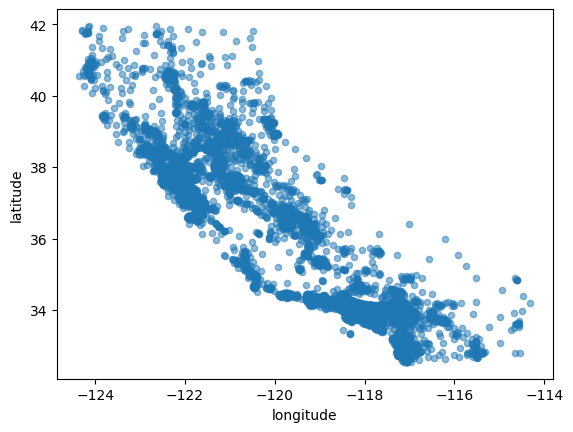

time: 193 ms (started: 2023-07-24 23:55:31 +00:00)


In [ ]:
train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5) # Esta es una distribucion "geográfica" de las casas
plt.show()

Una visualización un poco más elaborada (tipo mapa de calor, por precio de casa)

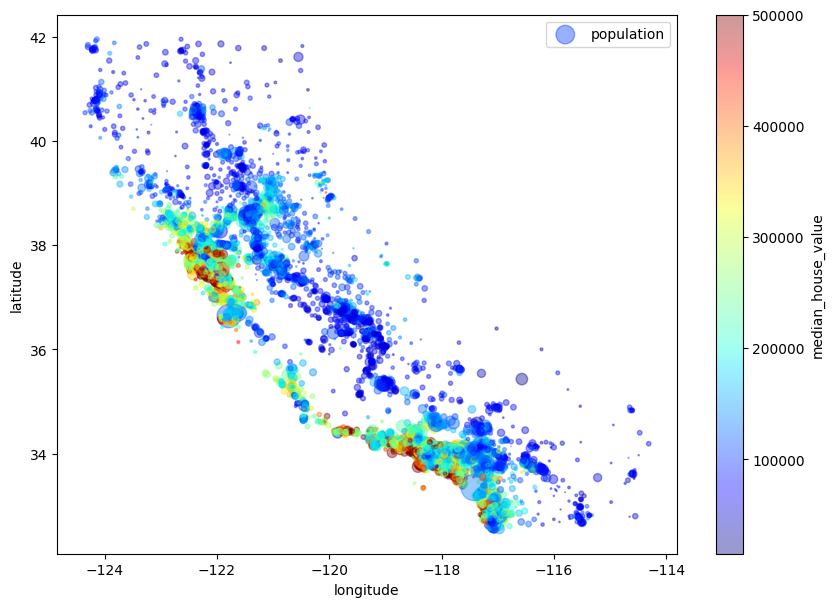

time: 474 ms (started: 2023-07-24 23:55:39 +00:00)


In [ ]:
train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=train_set["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.show()

Podemos calcular la matriz de correlación (de Pearson) entre todas las variables.

In [ ]:
# TODO: Hacer la matriz de correlacion, y también se podria incluir una representacion tipo heatmap de la matriz
import seaborn as sns


time: 97.5 ms (started: 2023-07-24 23:55:59 +00:00)


In [ ]:
corr_matrix = train_set.corr() # Vemos las correlaciones respecto a la variable a predecir
corr_matrix["median_house_value"].sort_values(ascending=False)

<ipython-input-22-47e5663bd754>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_set.corr() # Vemos las correlaciones respecto a la variable a predecir


median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

time: 13.8 ms (started: 2023-07-24 23:56:02 +00:00)


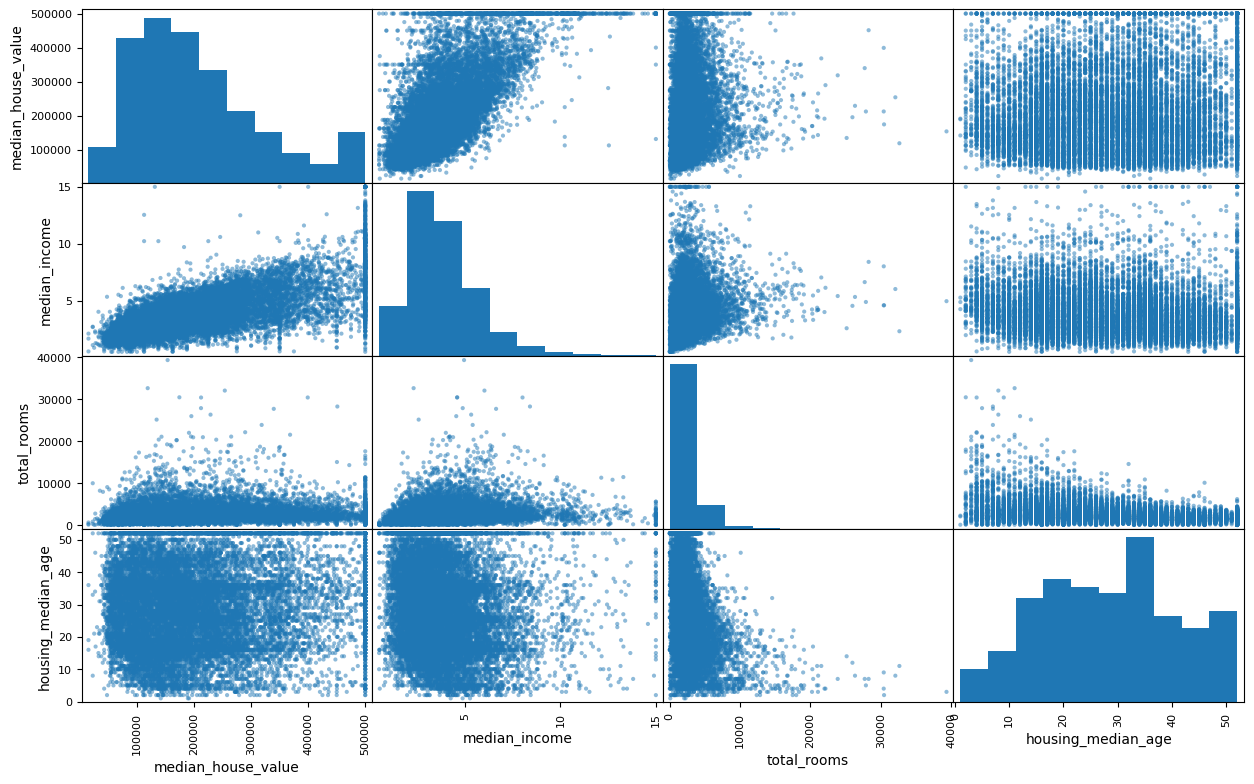

time: 1.58 s (started: 2023-07-24 23:56:06 +00:00)


In [ ]:
from pandas.plotting import scatter_matrix

# Nos interesan algunos atributos en particular
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(train_set[attributes], figsize=(15, 9))
plt.show()

Correlación particular sobre el conjunto de test, median income versus median house value.

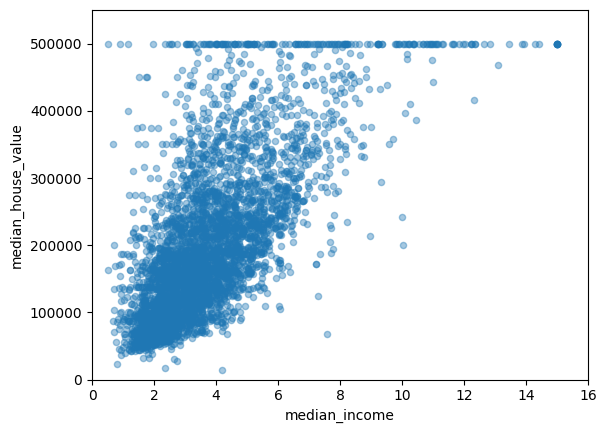

time: 312 ms (started: 2023-07-24 23:58:25 +00:00)


In [ ]:
test_set.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.4)
plt.axis([0, 16, 0, 550000])
plt.show()

Tambien podemos analizar el grado de ajuste de una variable, respecto a una distribución normal, haciendo un plot Q-Q.

median_income - mean: 3.88075425750969 std: 1.9042939225591973


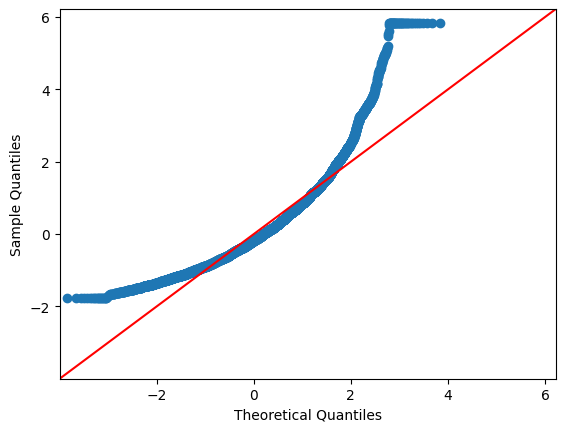

time: 890 ms (started: 2023-07-24 23:58:42 +00:00)


In [ ]:
import statsmodels.api as sm

X = train_set["median_income"]
print(X.name, "- mean:", X.mean(), "std:", X.std())
X_normed = (X - X.mean())/(X.std()) # Normalización (estandarizacion) de la serie
sm.qqplot(X_normed, line='45')
plt.show()

**Opcional:** Para ver la colinearidad (dependencia) entre los features, puede computarse la matriz de correlacion, o tambien aplicarse el VIF ([Variance Inflation Factor](https://www.investopedia.com/terms/v/variance-inflation-factor.asp#:~:text=A%20variance%20inflation%20factor%20(VIF)%20is%20a%20measure%20of%20the,only%20that%20single%20independent%20variable.)). Si el VIF > 10 significa que puede haber cierta colinearidad; si el VIF > 100 el efecto es mucho mas fuerte.

In [ ]:
train_set.corr()

<ipython-input-26-97f1dac84804>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_set.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349
latitude,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983
housing_median_age,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706
total_rooms,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989
total_bedrooms,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980
population,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032
households,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714
median_income,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647
median_house_value,-0.046349,-0.142983,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000


time: 47 ms (started: 2023-07-24 23:58:52 +00:00)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print('Variance Inflation Factors (VIF)')
print()
# Se calcula el VIF para cada variable
X = train_set.drop(["ocean_proximity", "median_house_value"], axis=1) #.astype('float64')
VIF = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
for idx, vif in enumerate(VIF):
  print('{0}: {1}'.format(train_set.columns[idx], round(vif,2)))

possible_multicollinearity = sum([1 for vif in VIF if (vif > 10)])
print()
print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))

Variance Inflation Factors (VIF)

longitude: 615.86
latitude: 549.5
housing_median_age: 7.27
total_rooms: 30.98
total_bedrooms: 95.51
population: 16.31
households: 93.55
median_income: 8.31

6 cases of possible multicollinearity
time: 64.4 ms (started: 2023-07-24 23:59:04 +00:00)


# **Curado del dataset**

In [ ]:
# Chequeo de valores faltantes (ej., number of bedrooms)
sample_incomplete_rows = housing_df[housing_df.isnull().any(axis=1)]
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


time: 24.6 ms (started: 2023-07-25 00:00:31 +00:00)


**Opción #1**: Borrar las instancias con valores NaN

In [ ]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


time: 13.2 ms (started: 2023-07-25 00:00:50 +00:00)


**Option #2**: Sacar la columna directamente

In [ ]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,2734.0,814.0,6.6073,258100.0,<1H OCEAN


time: 18.4 ms (started: 2023-07-25 00:00:55 +00:00)


**Opción #3**: Completar los valores faltantes conun indicador representativo (ej. la mediana)

In [ ]:
median = housing_df["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # Se aplica directo sobre el dataframe

sample_incomplete_rows

<ipython-input-30-1d27e9c309fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # Se aplica directo sobre el dataframe


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,435.0,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,435.0,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,435.0,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,435.0,2734.0,814.0,6.6073,258100.0,<1H OCEAN


time: 19.9 ms (started: 2023-07-24 22:43:17 +00:00)


Una alternativa a la Opción #3 (usando scikit-learn *Imputer*)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# Hay que borrarlo, porque la mediana solo puede computarse sobre atributos numericos
housing_num = train_set.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

# Las medianas de cada una de las columnas
imputer.statistics_

array([-1.1851e+02,  3.4260e+01,  2.9000e+01,  2.1290e+03,  4.3700e+02,
        1.1670e+03,  4.1000e+02,  3.5458e+00,  1.7985e+05])

time: 194 ms (started: 2023-07-24 22:43:17 +00:00)


In [ ]:
housing_num[housing_num.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value


time: 7.81 ms (started: 2023-07-24 22:43:18 +00:00)


Y se utiliza el imputer "entrenado" para transformar el training set y reemmplazar los valores faltantes con las medianas. El resultado es un arreglo NumPy que contiene los features transformados (de acuerdo al criterio del imputer)

In [ ]:
X = imputer.transform(housing_num)

time: 2.91 ms (started: 2023-07-24 22:43:18 +00:00)


In [ ]:
# Se vuelve a convertir X a un dataframe
housing_train_set = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

# Chequeo de nulos
sample_incomplete_rows = housing_train_set[housing_train_set.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value


time: 7.89 ms (started: 2023-07-24 22:43:18 +00:00)


# **Seleccion de un modelo y entrenamiento**

In [ ]:
X_train = housing_train_set.drop("median_house_value", axis=1)
# Separamos los valores a predecir (Y)
y_train = housing_train_set["median_house_value"].copy()

X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542


time: 14.7 ms (started: 2023-07-24 22:43:18 +00:00)


**Opción #1**: *LinearRegression (sklearn)*

Aplicación de un modelo regresion lineal incluyendo todas las variables

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_train)

time: 46 ms (started: 2023-07-24 22:43:18 +00:00)


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

time: 413 µs (started: 2023-07-24 22:43:18 +00:00)


Cómputo de R2 (sobre el conjunto de entrenamiento)

In [ ]:
r2 = r2_score(y_train, y_pred)
print("Train R2=", r2)

Train R2= 0.6400947924305292
time: 8.21 ms (started: 2023-07-24 22:43:18 +00:00)


También se puede calcular el R2 ajustado (en función del tamaño de la muestra y de la cantidad de variables)

In [ ]:
def r2_adjusted_score(r2, X, y):
  #return 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
  return 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

time: 523 µs (started: 2023-07-24 22:43:18 +00:00)


In [ ]:
print("Train R2adj=", r2_adjusted_score(r2, X_train, y_train))

Train R2adj= 0.6399203246573634
time: 617 µs (started: 2023-07-24 22:43:18 +00:00)


Computo del RMSE para evaluar las predicciones (sobre el conjunto de entrenamiento)

In [ ]:
import numpy as np

lin_mse = mean_squared_error(y_train, y_pred)
print("Train RMSE=", np.sqrt(lin_mse))

Train RMSE= 69362.34135238081
time: 1.69 ms (started: 2023-07-24 22:43:18 +00:00)


Tambien se puede calcular el MAE

In [ ]:
print("Train MAE=", mean_absolute_error(y_train, y_pred))

Train MAE= 50626.79448983825
time: 6.96 ms (started: 2023-07-24 22:43:18 +00:00)


Se pueden obtener los coeficientes (de cada feature) para la ecuación de regresion lineal

In [ ]:
cdf = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['Coefficients'])
cdf

,Coefficients
longitude,-42632.391717
latitude,-42450.071864
housing_median_age,1182.809649
total_rooms,-8.187977
total_bedrooms,116.260128
population,-38.492213
households,46.342572
median_income,40538.404387


time: 7.41 ms (started: 2023-07-24 22:43:18 +00:00)


In [ ]:
# Graficamente
def plot_coefficients(cdf, technique=None):
  fig, ax = plt.subplots(figsize=(20, 8))
  ax.stem(cdf.index, cdf['Coefficients'], markerfmt=' ')
  ax.set_xlabel('variable')
  ax.set_ylabel('coefficients')
  ax.set_title(technique);
  plt.xticks(rotation=45, fontsize=14)
  plt.show()

time: 537 µs (started: 2023-07-24 22:43:18 +00:00)


**Nota**: Dadas las diferencias de escala entre las distintas variables, probablemente convenga hacer primero una normalización o estandarización de las mismas.

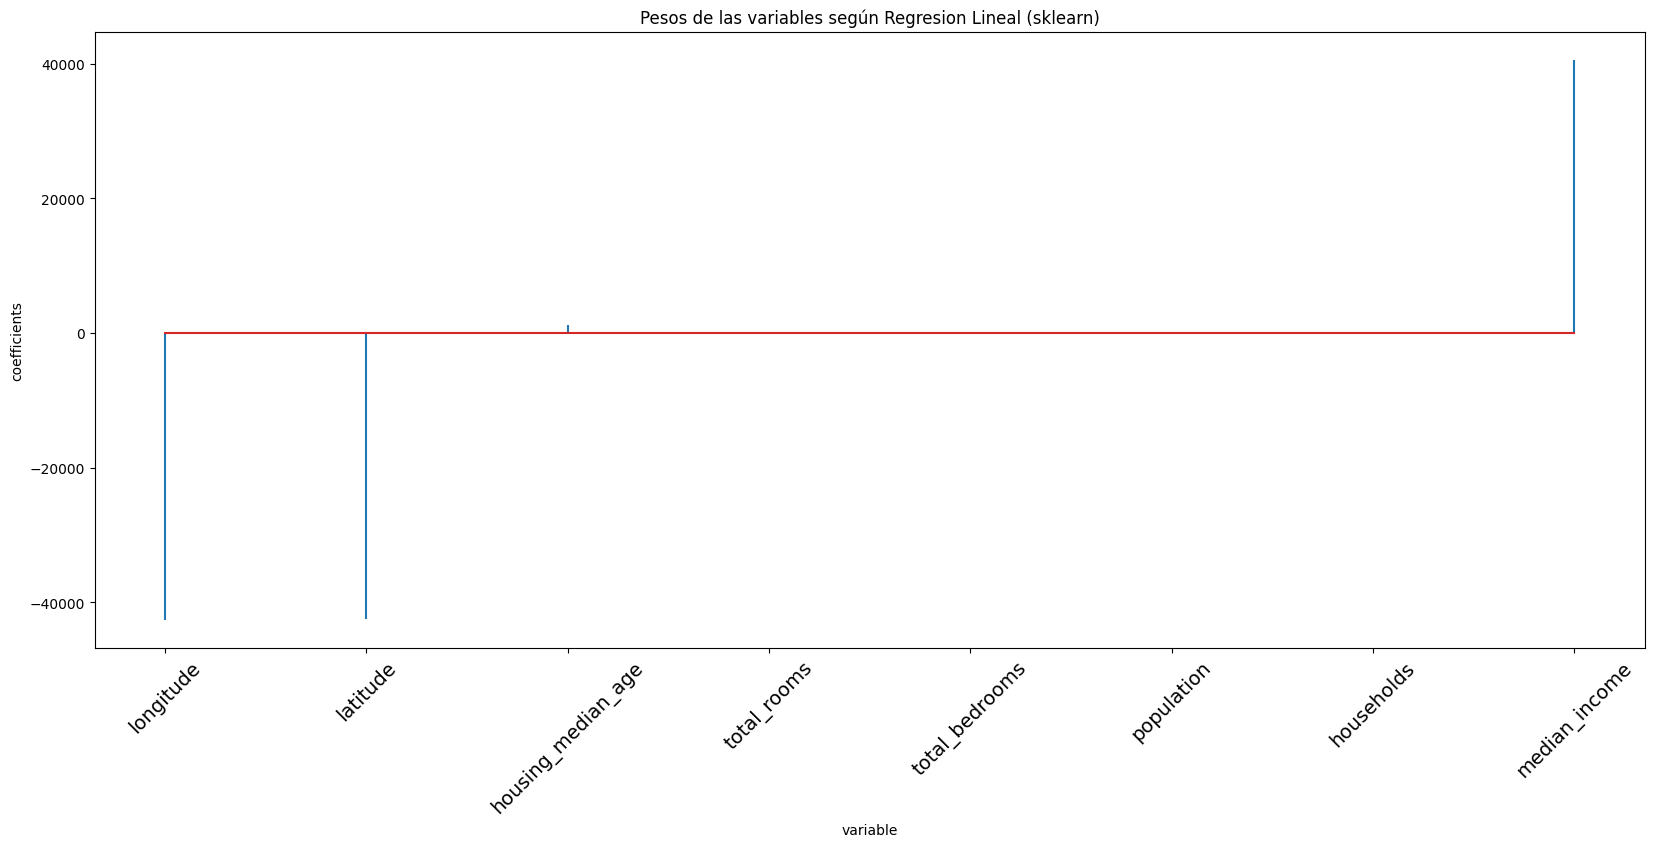

time: 225 ms (started: 2023-07-24 22:43:18 +00:00)


In [ ]:
plot_coefficients(cdf, "Pesos de las variables según Regresion Lineal (sklearn)")

Computo del RSME y MAE sobre el conjunto de test (para ver la diferencia con el conjunto de entrenamiento)

In [ ]:
housing_prepared_test = test_set.dropna(subset=["total_bedrooms"])
X_test = housing_prepared_test.drop(["median_house_value", "ocean_proximity"], axis=1)
# Separamos los valores a predecir (labels)
y_test = housing_prepared_test["median_house_value"]

y_pred = lin_reg.predict(X_test)

time: 9.6 ms (started: 2023-07-24 22:43:18 +00:00)


In [ ]:
r2 = r2_score(y_test, y_pred)
print("Test R2=", r2)
lin_mse = mean_squared_error(y_test, y_pred)
print("Test RMSE=", np.sqrt(lin_mse))
print("Test MAE=", mean_absolute_error(y_test, y_pred))

Test R2= 0.6230194767322181
Test RMSE= 70384.20647684588
Test MAE= 51338.18712025215
time: 2.08 ms (started: 2023-07-24 22:43:18 +00:00)


In [ ]:
print("Test R2adj=", r2_adjusted_score(r2, X_test, y_test))

Test R2adj= 0.6222485554167421
time: 343 µs (started: 2023-07-24 22:43:18 +00:00)


Vamos a una YellowBrick para visualizar la distribución de los errores

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


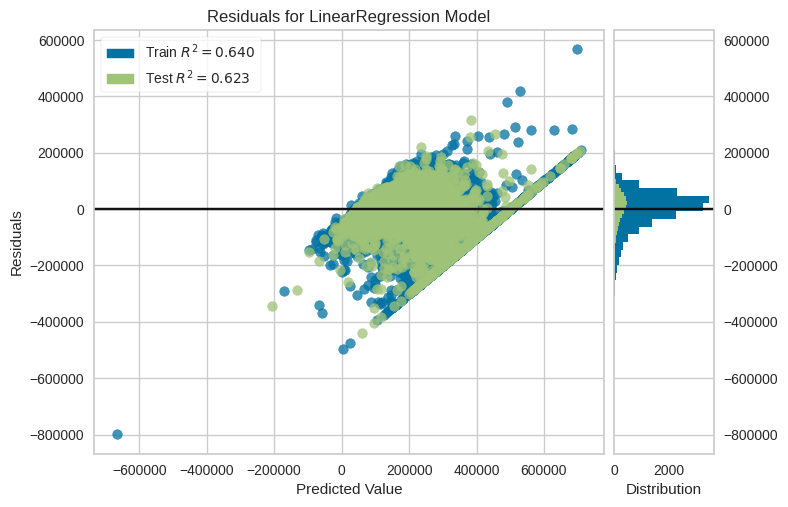

time: 705 ms (started: 2023-07-24 22:43:18 +00:00)


In [ ]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(lin_reg)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure
plt.show()

La distribucion (nromal?) de los residuos tambien puede analizarse con un plot Q-Q.

Residuos - mean: -510.0225561318288 std: 70391.3353426846


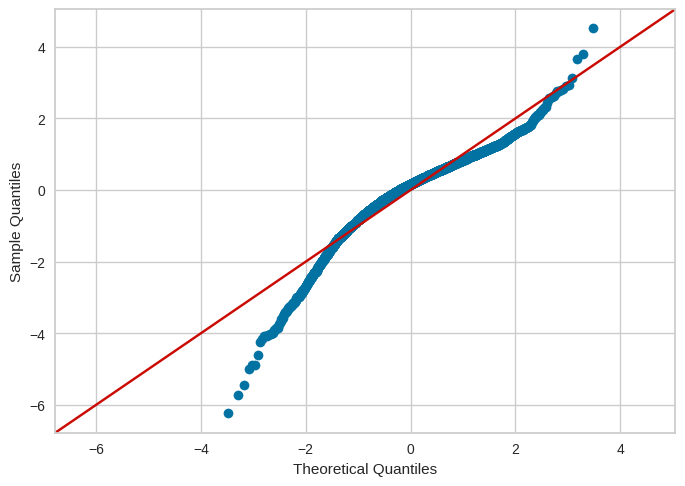

time: 289 ms (started: 2023-07-24 22:43:19 +00:00)


In [ ]:
import statsmodels.api as sm

X = y_pred - y_test # Residuos
print("Residuos - mean:", X.mean(), "std:", X.std())
X_normed = (X - X.mean())/(X.std()) # Normalización (estandarizacion) de la serie
sm.qqplot(X_normed, line='45')
plt.show()

**Opción #2**: *Ordinary Least Squares (statsmodels)*

Otra forma de realizar la regresion multi-variada es con OLS

In [ ]:
import statsmodels.api as sm

# Tomamos las variables (del conjunto de entrenamiento)
X, y = X_train, y_train
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

# El R2 ajustado
print("Train R2_adj=", model.rsquared_adj)

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     3669.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:43:19   Log-Likelihood:            -2.0749e+05
No. Observations:               16512   AIC:                         4.150e+05
Df Residuals:                   16503   BIC:                         4.151e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.578e+06   6.96

In [ ]:
# Vemos las predicciones (conjunto de entrenamiento)
y_pred = model.predict(X)

r2 = r2_score(y_train, y_pred)
print("Train R2=", r2)
print("Train R2_adj=", r2_adjusted_score(r2, X_train, y_train))
lin_mse = mean_squared_error(y_train, y_pred)
print("Train RMSE=", np.sqrt(lin_mse))
print("Train MAE=", mean_absolute_error(y_train, y_pred))

Train R2= 0.6400947924305292
Train R2_adj= 0.6399203246573634
Train RMSE= 69362.34135238081
Train MAE= 50626.79448983817
time: 13.7 ms (started: 2023-07-24 22:43:19 +00:00)


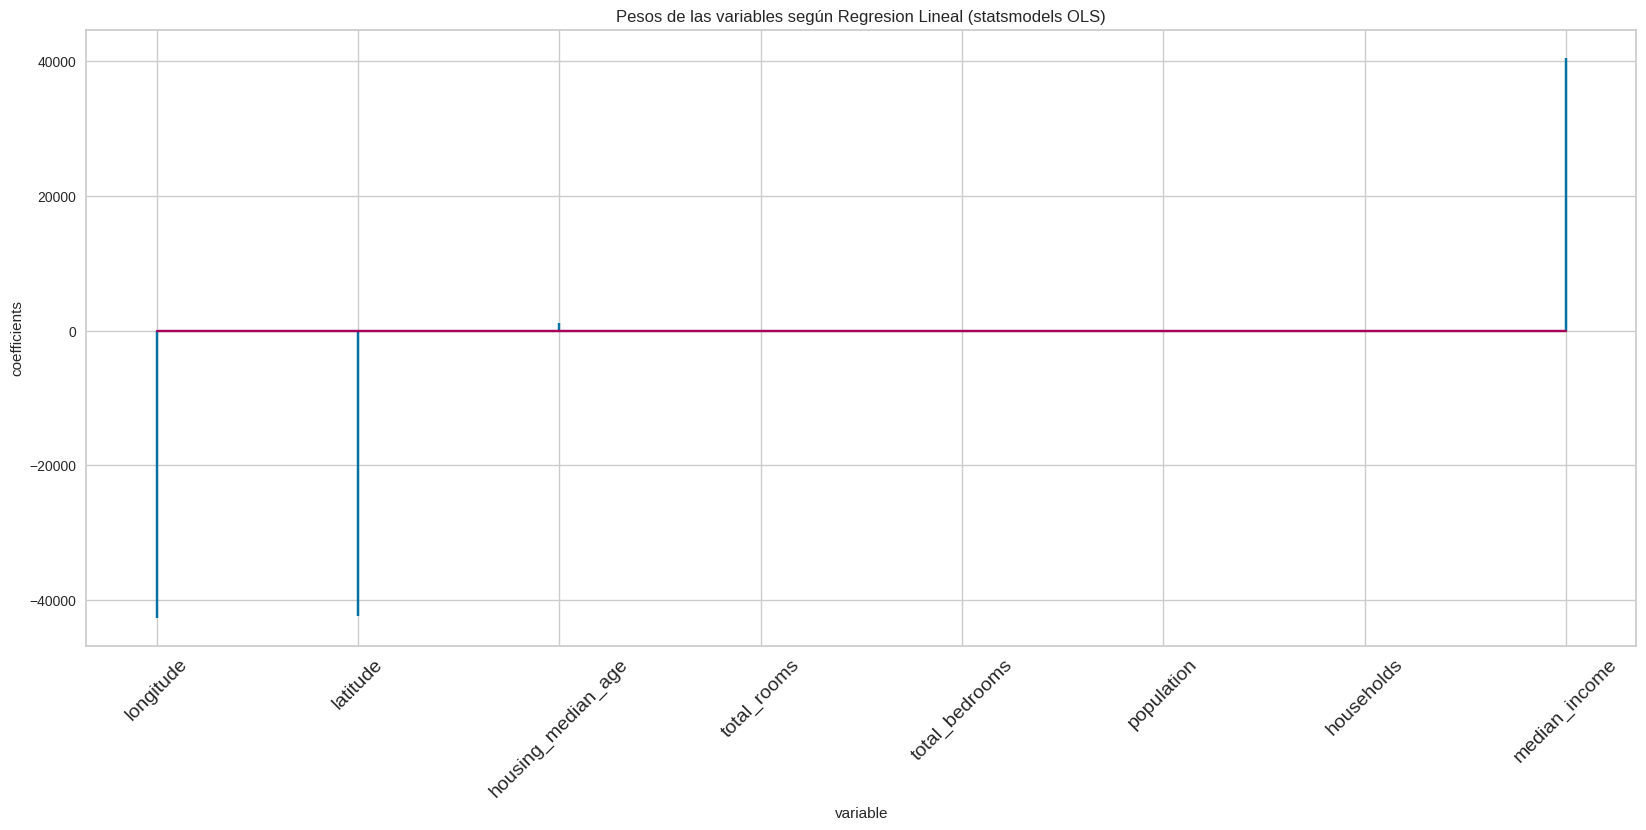

time: 379 ms (started: 2023-07-24 22:43:19 +00:00)


In [ ]:
# Verificamos el peso de cada coeficiente
cdf = pd.DataFrame(model.params.values, model.params.index, columns=['Coefficients'])
cdf = cdf.drop('const')
plot_coefficients(cdf, "Pesos de las variables según Regresion Lineal (statsmodels OLS)")

In [ ]:
# Vemos las predicciones (conjunto de test)
X, y = X_test, y_test
X = sm.add_constant(X)
y_pred = model.predict(X)

r2 = r2_score(y_test, y_pred)
print("Test R2=", r2)
print("Test R2_adj=", r2_adjusted_score(r2, X_test, y_test))
lin_mse = mean_squared_error(y_test, y_pred)
print("Test RMSE=", np.sqrt(lin_mse))
print("Test MAE=", mean_absolute_error(y_test, y_pred))

Test R2= 0.6230194767322104
Test R2_adj= 0.6222485554167343
Test RMSE= 70384.2064768466
Test MAE= 51338.18712025255
time: 20.2 ms (started: 2023-07-24 22:43:20 +00:00)


# **Cross-validation**

In [ ]:
type(lin_reg)

sklearn.linear_model._base.LinearRegression

time: 6.51 ms (started: 2023-07-24 22:43:20 +00:00)


In [ ]:
from sklearn.model_selection import cross_val_score

# Aplicamos el procedimiento de cross validation, usando R2 como metrica
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring="r2", cv=10)

print("CV scores (R2):", lin_scores)
print("Mean:", lin_scores.mean())
print("Standard deviation:", lin_scores.std())

CV scores (R2): [0.67299942 0.6210927  0.64394754 0.6365495  0.6284271  0.67405562
 0.6585861  0.61597018 0.5935664  0.63561614]
Mean: 0.6380810702173266
Standard deviation: 0.024143330449115298
time: 259 ms (started: 2023-07-24 22:43:20 +00:00)


Para determinar cual modelo tiene mejor performance, los valores promedio de cross-validation pueden ser engañosos.
Una opción mas solida es evaluar la distribucion de los scores.

Si tuvieramos varios modelos, puede tambien analizarse si las diferencias entre las medias de los modelos son reales en terminos de significancia estadistica.

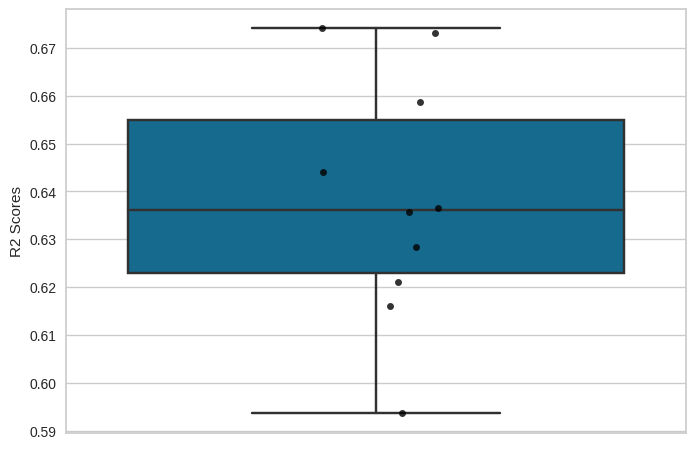

time: 316 ms (started: 2023-07-24 22:43:20 +00:00)


In [ ]:
import seaborn as sns

data = pd.DataFrame(lin_scores, columns=['R2 Scores'])
boxplot = sns.boxplot(y="R2 Scores", data=data)
boxplot = sns.stripplot(y="R2 Scores", data=data, marker="o", alpha=0.8, color="black")

# **Extra: CatBoost**

Los modelos de regresion lineal son normalmente la primera opcion (y la más simple) para evaluar. No obstante, existen otras técnicas para tratar problemas de regresión que suelen tener mejor performance. Uno de estos modelos es [CatBoost](https://catboost.ai/), que está basado en técnicas de gradient boosting, y brinda además manejo de variables categóricas y heuristicas para evitar overfitting, entre otras características.

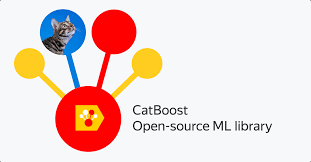

In [ ]:
housing_df = pd.read_csv(url2) # Cargamos nuevamente el dataset
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


time: 89.2 ms (started: 2023-07-24 22:43:20 +00:00)


In [ ]:
median = housing_df["total_bedrooms"].median()
housing_df["total_bedrooms"].fillna(median, inplace=True)

time: 2.01 ms (started: 2023-07-24 22:43:20 +00:00)


In [ ]:
X = housing_df.drop('median_house_value', axis=1)
y = housing_df['median_house_value']

time: 1.81 ms (started: 2023-07-24 22:43:20 +00:00)


In [ ]:
print(X.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
dtype: object
time: 2.35 ms (started: 2023-07-24 22:43:20 +00:00)


In [ ]:
# Lista de columnas categoricas
categoricalcolumns = X.select_dtypes(include=["object"]).columns.tolist()
print("Names of categorical columns : ", categoricalcolumns)

# Ubicacion de cada columna categorica
cat_features = [X.columns.get_loc(col) for col in categoricalcolumns]
print("Location of categorical columns : ",cat_features)

Names of categorical columns :  ['ocean_proximity']
Location of categorical columns :  [8]
time: 8.85 ms (started: 2023-07-24 22:43:20 +00:00)


In [ ]:
# Dividimos en conjuntos de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

print("Train data size:", X_train.shape)
print("Test data size:", X_test.shape)

Train data size: (16512, 9)
Test data size: (4128, 9)
time: 6.73 ms (started: 2023-07-24 22:43:20 +00:00)


In [ ]:
from catboost import Pool

# Creating pool object for train dataset. We give information of categorical features
train_data = Pool(data=X_train, label=y_train, cat_features=cat_features)
# Creating pool object for test dataset
test_data = Pool(data=X_test, label=y_test, cat_features=cat_features)

time: 524 ms (started: 2023-07-24 22:43:20 +00:00)


In [ ]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(loss_function='RMSE')

#cat_model.fit(X_train, y_train, cat_features=cat_features, verbose=False)
cat_model.fit(train_data, verbose=False)

time: 17.4 s (started: 2023-07-24 22:43:21 +00:00)


In [ ]:
cat_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntr

time: 7.04 ms (started: 2023-07-24 22:43:38 +00:00)


Importancia de cada feature en el modelo

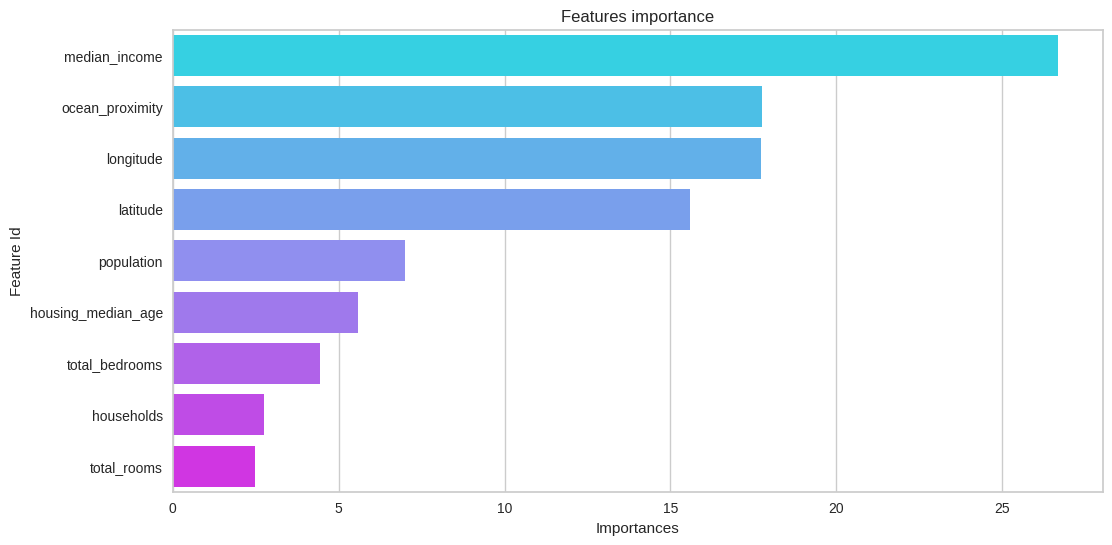

time: 506 ms (started: 2023-07-24 22:43:38 +00:00)


In [ ]:
df_feature_importance = pd.DataFrame(cat_model.get_feature_importance(prettified=True))

plt.figure(figsize=(12, 6));
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance, palette="cool");
plt.title('Features importance');

Evaluación sobre el conjunto de test

In [ ]:
y_pred = cat_model.predict(X_test)
catboost_mse = mean_squared_error(y_test, y_pred)
catboost_rmse = np.sqrt(catboost_mse)
print("Test RMSE=", catboost_rmse)
r2 = r2_score(y_test, y_pred)
print("Test R2=", r2)
print("Test R2_adj=", r2_adjusted_score(r2, X_test, y_test))

Test RMSE= 45693.128025630285
Test R2= 0.8406709673517807
Test R2_adj= 0.8403227494562406
time: 11.1 ms (started: 2023-07-24 22:43:39 +00:00)


---

## **Ejercicio**

In [ ]:
# TODO: Realizar una validacion cruzada (cross-validation) para el modelo generado con CatBoost

time: 1.95 ms (started: 2023-07-24 22:43:39 +00:00)


In [ ]:
# TODO: Graficar boxplots comparativos de performance contra Linear Regression.

time: 420 µs (started: 2023-07-24 22:43:39 +00:00)


---